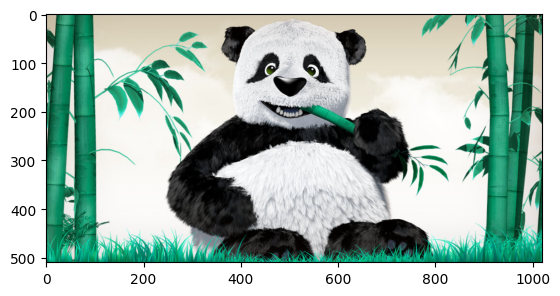

(510, 1020, 3)


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Panda.jpg')
# img = cv.resize(img, (480, 480))

plt.imshow(img)
plt.show()
print(img.shape)

In [11]:
edge = cv.Canny(img, 50, 150, apertureSize=5)
cv.imshow('CANNY', edge)
cv.waitKey(0)

-1

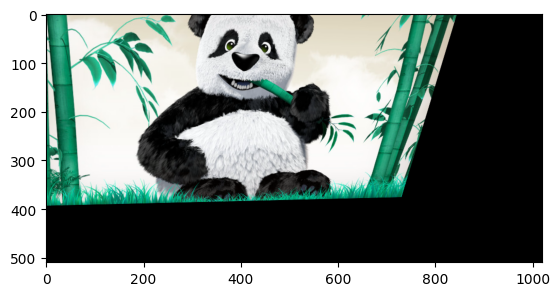

In [191]:
src_points = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
dst_points = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
# dst_points = np.float32([[0, 300], [300, 300],[0, 0], [300, 0]])

matrix = cv.getPerspectiveTransform(src_points, dst_points)
dims = (int(img.shape[1]), int(img.shape[0]))

result = cv.warpPerspective(img, matrix, dims)

plt.imshow(result)

In [185]:
rows, cols = result.shape[:2]

kernel_x = cv.getGaussianKernel(cols, 200)                  #Standard deviation shows how data is distributed, smaller deviation means clustered data 
kernel_y = cv.getGaussianKernel(rows, 200)

kernel = kernel_y * kernel_x.T

kernel = kernel/np.linalg.norm(kernel)

print(kernel.shape)
print(np.amax(kernel))



(510, 1020)
0.002927795881835132


0.5855591763670264
(510, 1020, 3)


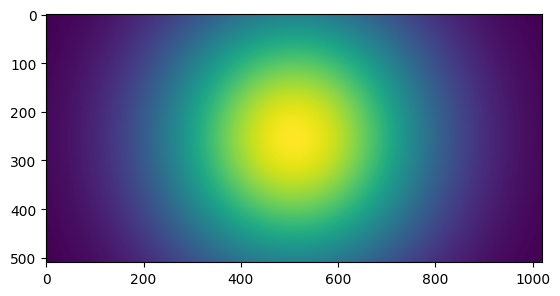

In [186]:
# mask = np.zeros((kernel.shape[1], kernel.shape[0]))

mask = 200*kernel
print(np.amax(mask))
# mask2 = 100*kernel
# mask3 = 500*kernel

output = np.copy(result)

print(output.shape)
# cv.imshow("Mask", mask)
plt.imshow(mask)
# cv.imshow("100", mask2)
# cv.imshow("500", mask3)
# cv.waitKey()


In [187]:
output[:,:,0] = output[:,:,0] * mask
output[:,:,1] = output[:,:,1] * mask
output[:,:,2] = output[:,:,2] * mask


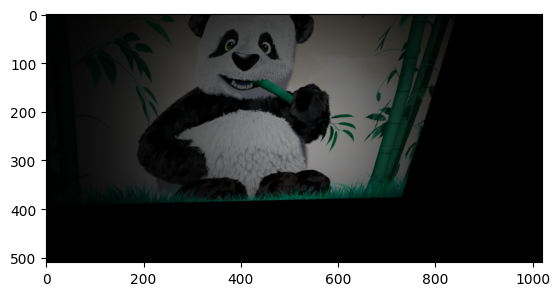

In [188]:
plt.imshow(output)
plt.show()

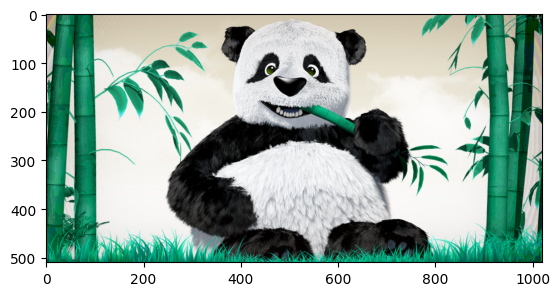

In [135]:
remove = np.copy(output)

for i in range(3):
    remove[:,:,i] = remove[:,:,i] // mask


plt.imshow(remove)
plt.show()